##Optimizing IT Service Management and IT process' Resolver groups through productivity ananlysis. 

The process scketch below outlines Analysing the "Entitlement Full Time Equivalents" using ticket data from IT Service Management tools, "Time on floor" access control data and Employee databases.

By the end of the project, we should be able to arrive at the "Entitlement Full Time Equivalents" that may be re-deployed to other projects without any impact to the current process' productivity and performance.

Computing Productive Hours:

In [44]:
working_days = 22
productive_hrs_per_day = 7
FTE_Hrs_Per_Month = working_days*productive_hrs_per_day
print("Full Time Equivalent Productive Hours per Month: ", FTE_Hrs_Per_Month)

Full Time Equivalent Productive Hours per Month:  154


To keep things simple and for the purpose of this illustration, let's say we have 8 employees in an IT Service Team and we've obtained the employee's number of days worked and average productive hours per day (from access control, systems software, etc...)

In [45]:
import pandas as pd
data = { 'Emp_ID':['E1','E2','E3','E4','E5','E6','E7','E8'],
                'January_Days_Worked': ['21','19','14','22','18','14','22','16'], 
                'Jan_Avg_Hrs_Per_Day': ['4.5','5.9','6.8','5.7','6.7','6.5','5.1','6.5']}


In [46]:
Employee_Data = pd.DataFrame(data)
Employee_Data['January_Days_Worked'] = Employee_Data['January_Days_Worked'].astype(float)
Employee_Data['Jan_Avg_Hrs_Per_Day'] = Employee_Data['Jan_Avg_Hrs_Per_Day'].astype(float)

print(Employee_Data)

  Emp_ID  January_Days_Worked  Jan_Avg_Hrs_Per_Day
0     E1                21.00                 4.50
1     E2                19.00                 5.90
2     E3                14.00                 6.80
3     E4                22.00                 5.70
4     E5                18.00                 6.70
5     E6                14.00                 6.50
6     E7                22.00                 5.10
7     E8                16.00                 6.50


Let's compute the expected vs actual hours

In [47]:
Employee_Data['Jan_Actual_Hrs'] =  Employee_Data['January_Days_Worked']*Employee_Data['Jan_Avg_Hrs_Per_Day']
Employee_Data['Jan_Expected_Hrs'] = Employee_Data['January_Days_Worked']*productive_hrs_per_day

The difference between the Expected and Actual:

In [48]:
Employee_Data['Jan_Difference_Hrs'] = Employee_Data['Jan_Expected_Hrs']-Employee_Data['Jan_Actual_Hrs']

Taking a look at our data:

In [49]:
pd.set_option('display.max_columns',None)
print(Employee_Data)

  Emp_ID  January_Days_Worked  Jan_Avg_Hrs_Per_Day  Jan_Actual_Hrs  \
0     E1                21.00                 4.50           94.50   
1     E2                19.00                 5.90          112.10   
2     E3                14.00                 6.80           95.20   
3     E4                22.00                 5.70          125.40   
4     E5                18.00                 6.70          120.60   
5     E6                14.00                 6.50           91.00   
6     E7                22.00                 5.10          112.20   
7     E8                16.00                 6.50          104.00   

   Jan_Expected_Hrs  Jan_Difference_Hrs  
0            147.00               52.50  
1            133.00               20.90  
2             98.00                2.80  
3            154.00               28.60  
4            126.00                5.40  
5             98.00                7.00  
6            154.00               41.80  
7            112.00              

The "Entitlement Full Time Equivalent" should give us a projection on,

*   What the number would look like - how much of the workforce may be re-deployed just for the Month of January. 
*   Repeating this exercise for Feb and Mar should give us, on an average over a quarter - the workforce that can be re-deployed, without affecting the exisiting project.

In [50]:
Employee_Data['Jan_Entitlement_FTE'] = Employee_Data['Jan_Difference_Hrs']/(FTE_Hrs_Per_Month)

In [51]:
pd.set_option('display.max_columns',None)
print(Employee_Data)

  Emp_ID  January_Days_Worked  Jan_Avg_Hrs_Per_Day  Jan_Actual_Hrs  \
0     E1                21.00                 4.50           94.50   
1     E2                19.00                 5.90          112.10   
2     E3                14.00                 6.80           95.20   
3     E4                22.00                 5.70          125.40   
4     E5                18.00                 6.70          120.60   
5     E6                14.00                 6.50           91.00   
6     E7                22.00                 5.10          112.20   
7     E8                16.00                 6.50          104.00   

   Jan_Expected_Hrs  Jan_Difference_Hrs  Jan_Entitlement_FTE  
0            147.00               52.50                 0.34  
1            133.00               20.90                 0.14  
2             98.00                2.80                 0.02  
3            154.00               28.60                 0.19  
4            126.00                5.40               

Visualising a subset of the above data:



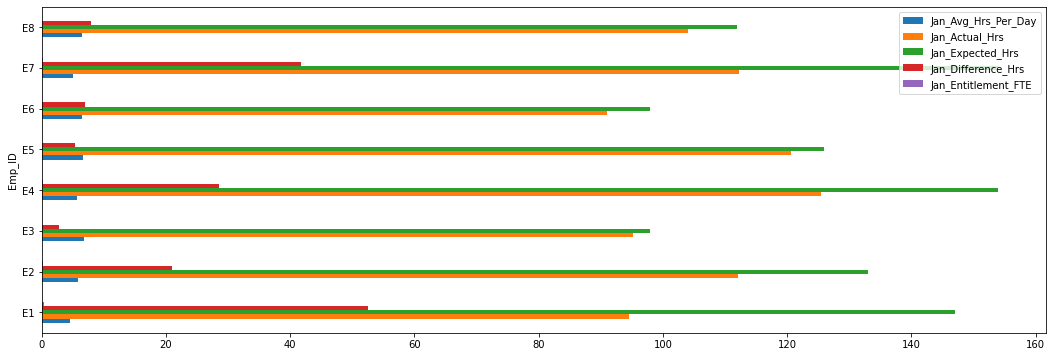

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
df_entitle = Employee_Data.drop(columns='January_Days_Worked')
df_entitle.plot.barh(figsize = (18,6),x='Emp_ID')

A lot of useful inferences concerning employee productivity can be derived at, looking at the graph above:


*   Employee1 and Employee7 have a big difference concerning expected vs actual productive hours
*   Employee4 and 7, have the highest expected hours so they were more"Present" for the month of January, although Employee 7 could have been a lot more productive
*and so on...



We can now compute the overall "Entitlement Full Time Equivalent (FTE) for January as below: (and repeat the steps above for each month for a quarter or so, to arrive at what could be a fair decision on our productivity analysis)

In [53]:
print("%.2f" % Employee_Data['Jan_Entitlement_FTE'].sum())

1.08


The above concept can be extended to apply [Takt Time](https://www.lean.org/lexicon-terms/takt-time/#:~:text=The%20available%20production%20time%20divided,takt%20time%20is%20two%20weeks.) and further analysis, if we can include incoming volume of Tickets that needs to be worked upon

